In [1]:
# import the common libraries for mathematical and data frames
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# some useful stuff from stats scipy
import scipy.stats as stats 

#to show the graphs inline in the jupyter notebook
%matplotlib inline

In [2]:
#set the basic figure size and pallete
plt.figure(figsize=(10,15))

sns.set()
pal = sns.hls_palette(8, l=.3, s=.8)
sns.set_palette(pal)

<Figure size 720x1080 with 0 Axes>

In [3]:
#read data into a data frame
dfGolfData = pd.read_excel("SM4-Golf.xls")

In [4]:
#verify top 5 data
dfGolfData.head(5)

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [5]:
#check the number of rows, columns and dataypes of each column using the info()
dfGolfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


In [6]:
#check for any null values
dfGolfData.isna().any()

Current    False
New        False
dtype: bool

In [7]:
dfGolfData.shape

(40, 2)

In [8]:
#lets check for any missing value or 0 values
dfGolfData[dfGolfData.Current == 0].count()['Current']

0

In [9]:
#lets check for any missing value or 0 values
dfGolfData[dfGolfData.New == 0].count()['New']

0

C:\Users\v-sarvk\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


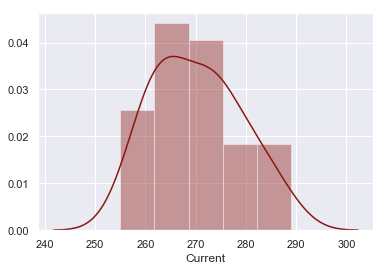

In [10]:
#univariate analysis
sns.distplot(dfGolfData["Current"])

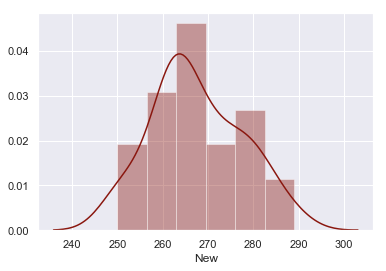

In [11]:
#univariate analysis
sns.distplot(dfGolfData["New"])

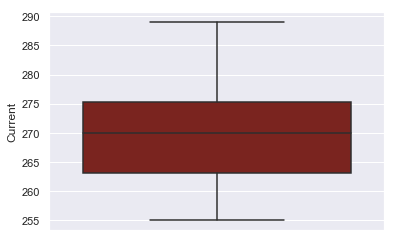

In [12]:
#lets visualize box plot also, for any outliers
sns.boxplot(y=dfGolfData['Current'])

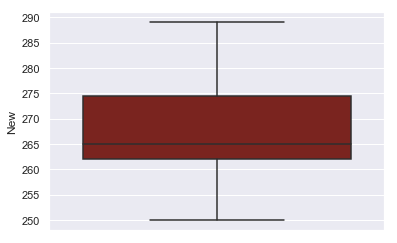

In [13]:
#lets visualize box plot also, for any outliers
sns.boxplot(y=dfGolfData['New'])

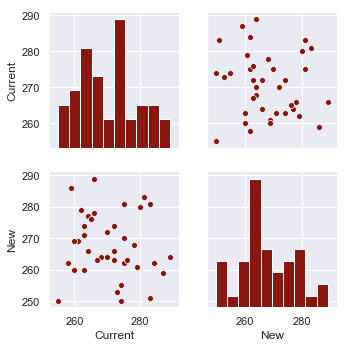

In [14]:
# create a pair plot using sns to identify the distribution of data between two values 
#multiple pairwise bivariate distributions 

sns.pairplot(dfGolfData[['Current','New']])

In [15]:
#lets calculate IQR range
Q1 = dfGolfData.quantile(0.25)
Q3 = dfGolfData.quantile(0.75)
IQR = Q3 - Q1

IQR

Current    12.25
New        12.50
dtype: float64

# Check Data is Gaussian or not

If Data Is Gaussian:
	Use Parametric Statistical Methods

Else:
	Use Nonparametric Statistical Methods
    
To check this we have normality test and graphical test also

In [16]:
from numpy import mean
from numpy import std

In [17]:
#graphical test for Current Golf data
# summarize
print('Current Golf Ball Data has a Mean=%.3f and Stdv=%.3f' % (mean(dfGolfData.Current), std(dfGolfData.Current)))

Current Golf Ball Data has a Mean=270.275 and Stdv=8.643


In [18]:
#graphical test for New Golf data
# summarize
print('New Golf Ball Data has a Mean=%.3f and Stdv=%.3f' % (mean(dfGolfData.New), std(dfGolfData.New)))

New Golf Ball Data has a Mean=267.500 and Stdv=9.772


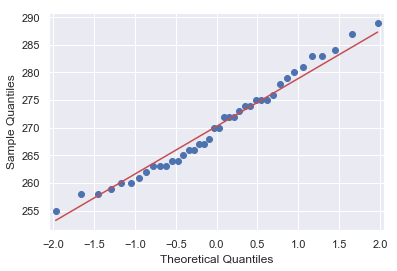

In [19]:
#plot for checking the distribution of a data sample is the quantile-quantile plot
from statsmodels.graphics.gofplots import qqplot

# q-q plot
qqplot(dfGolfData.Current, line='s')
plt.show()

QQ plot showing the scatter plot of points in a diagonal line, closely fitting the expected diagonal pattern for a sample from a Gaussian distribution.

There are a few small deviations, especially at the bottom of the plot, which is to be expected given the small data sample.

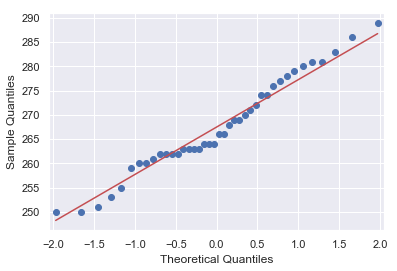

In [20]:
# q-q plot for New Golf Ball Column
qqplot(dfGolfData.New, line='s')
plt.show()

QQ plot showing the scatter plot of points in a diagonal line, closely fitting the expected diagonal pattern for a sample from a Gaussian distribution.

There are wavy small deviations, especially at the bottom of the plot and middle



Set Null Hypothesis

H0: Data is drawn from Gaussian Distribution

H1: Data is not Gaussian distribution


# The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution

You can interpret the p value as follows.

p <= alpha: reject H0, not normal.

p > alpha: fail to reject H0, normal.

In [21]:
from scipy.stats import shapiro
# normality test for Current Golf Balls
stat, p = shapiro(dfGolfData.Current)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret whether the sample for the Current balls is from Gaussian distribution or not
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.971, p=0.379
Sample looks Gaussian (fail to reject H0)


In [22]:
# normality test for New Golf Balls
stat, p = shapiro(dfGolfData.New)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret whether the sample for the New balls is from Gaussian distribution or not
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.968, p=0.306
Sample looks Gaussian (fail to reject H0)


So both column data are from the Gaussian distribution

# Now will do Levene test, which tests the null hypothesis that all input samples are from populations with equal variances

H0: Samples are from population with equal variances

H1: Samples are not with equal variances

tests the null hypothesis that all samples come from populations with equal variances. It returns the test statistic and the probabilty.

In [23]:
from scipy.stats import levene
# Levene variance test for Current and New ball groups 
stat, p = levene(dfGolfData.Current, dfGolfData.New)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.255, p=0.615


In [24]:
# interpret whether the samples are from populations with equal variances
alpha = 0.05
if p > alpha:
    print('Sample  data sets conform to the variance criterion')
else:
    print('Sample data sets does not conform to the variance criterion')

Sample  data sets conform to the variance criterion


Since from the ablove levene test it appears that the variance are equal for samples drawn from the population, therefore we can go ahead and use the T-Test with parameter equal_var=True

Why T Test?

The Independent Samples t Test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different.

# Formulate and present the rationale for a hypothesis test that par could use to compare the driving distances of the current and new golf balls!

------------------------------------------------------------------------------------------------------------------------------
New ball with cut resistant and long lasting feature will be introduced to increase the market share of the company, but we need to check that the driving force of New ball with these new features shouldn't impact and remains in concordance with the Current balls driving force


Setting the NULL Hypothesis

If mu1 is the population means driving distance for the current golf ball and mu2 is the  population means driving distance for the new golf ball.
 
H0: mu1 = mu2 (the means of two independent groups is same)
 
Ha: mu1 is not equal to mu2 (the means of two independent groups is not same)
 
Test statistics: Two sample t-test

Why we will use Independent t Test is because we have two indpendent sampels and from Gaussian distribution


In [25]:
#for equal variance as proved above via levene, we will use equal_var=True, and for unequal it should be equal_var=False
t, p = stats.ttest_ind(dfGolfData.Current, dfGolfData.New, equal_var = True)
print('T Statistics: %.3f, and p-value: %.3f' %(t,p))

T Statistics: 1.328, and p-value: 0.188


# Analyse the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

In [26]:
# interpret whether the mean of the Current balls is same as that of the New balls
alpha = 0.05
if p > alpha:
    print('The means of two independent groups is same (fail to reject H0)')
else:
    print('The means of two independent groups is not same (reject H0)')

The means of two independent groups is same (fail to reject H0)


My Recommendation based on the above p-value - Conclude that population means driving distances of the current and new golf balls are equal, and hence we can go ahead with the New ball

# Provide descriptive statistical summaries of the data for each model!

In [27]:
# to get the basic statistical information and 5 number summary for Current Column
dfGolfData.Current.describe()

count     40.000000
mean     270.275000
std        8.752985
min      255.000000
25%      263.000000
50%      270.000000
75%      275.250000
max      289.000000
Name: Current, dtype: float64

In [28]:
# to get the basic statistical information and 5 number summary for New Column
dfGolfData.New.describe()

count     40.000000
mean     267.500000
std        9.896904
min      250.000000
25%      262.000000
50%      265.000000
75%      274.500000
max      289.000000
Name: New, dtype: float64

# What is the 95% confidence interval for the population mean driving distance of each model

In [29]:
#The critical value can be calculated using the degrees of freedom and a significance level 
#with the percent point function (PPF)

from scipy.stats import t

# For Current
#Since there 40 data values in the sample so degree of freedom is
dof_Current = 39 #(N-1)
mean_Current = 270.275
std_dev_Current = 8.75
alpha=0.05

t_critical_Current = t.ppf(1-0.05/2 , dof_Current)

#95% confidence interval for current model:
lower_Current = mean_Current - (t_critical_Current * std_dev_Current/np.sqrt(dof_Current)) 
upper_Current = mean_Current + (t_critical_Current * std_dev_Current/np.sqrt(dof_Current)) 

print("95% CI [{}, {}]".format(lower_Current.round(3), upper_Current.round(3)))

95% CI [267.441, 273.109]


In [30]:
# For New Balls
#Since there 40 data values in the sample so degree of freedom is
dof_New = 39 #(N-1)
mean_New = 267.50
std_dev_New = 9.896
alpha=0.05

t_critical_New = t.ppf(1-0.05/2 , dof_New)
# why we did alpha/2 is because its a two tailed test

#95% confidence interval for current model:
lower_New = mean_New - (t_critical_New * std_dev_New/np.sqrt(dof_New)) 
upper_New = mean_New + (t_critical_New * std_dev_New/np.sqrt(dof_New)) 

print("95% CI [{}, {}]".format(lower_New.round(3), upper_New.round(3)))

95% CI [264.295, 270.705]


# What is the 95% confidence interval for the difference between the means of the two populations?

In [31]:
# standard error of the means
sd_error = np.sqrt((std_dev_Current ** 2)/40 + (std_dev_New ** 2)/40)
#sd_error
t_critical = t.ppf(1-alpha/2, 39)

In [32]:
print("Confidence Interval:")
print("95% CI (mean_New - mean_Current) [{}, {}]".format(mean_Current - mean_New - (t_critical * sd_error), 
                                                       mean_Current - mean_New + (t_critical * sd_error)))
  

Confidence Interval:
95% CI (mean_New - mean_Current) [-1.4496323994066032, 6.999632399406558]


# Do you see a need for larger sample sizes and more testing with the golf balls?

Cohen's d is the appropriate effect size measure if two groups have similar standard deviations and are of the same size

Small Effect Size: d=0.20

Medium Effect Size: d=0.50

Large Effect Size: d=0.80

In [33]:
#Calculate the Pooled Standard Deviation
# took formulae from wiki

pooled_SD = np.sqrt((dof_Current * (std_dev_Current**2) + dof_New * (std_dev_New**2))/(dof_Current + dof_New))
pooled_SD

9.340591951263047

In [34]:
cohensd = (mean_Current - mean_New)/pooled_SD
cohensd

0.2970903786911212

The difference between the means is 0.29 of one standard deviation interpreted as a small effect size

In [35]:
# estimate sample size via power analysis
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect = 0.29 #cohensd value calculated above for this sample data
alpha = 0.05
power = 0.80
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 187.621


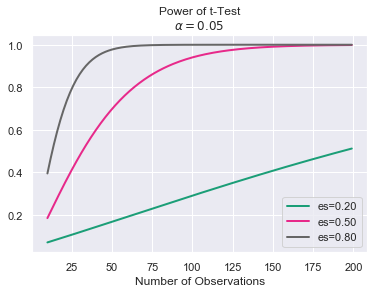

In [36]:
# calculate power curves for varying sample and effect size
from numpy import array

# parameters for power analysis
effect_sizes = array([0.2, 0.5, 0.8]) #these are the 3 standard cohen values
sample_sizes = array(range(10, 200)) #considering sample size from 10 to 200

# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, alpha=0.05,
                   title='Power of t-Test' + '\n' + r'$\alpha = 0.05$')
plt.show()

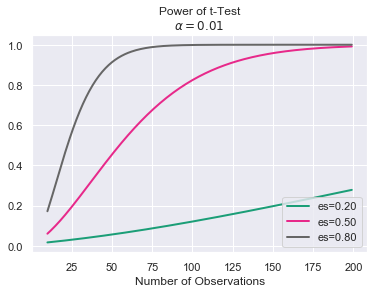

In [37]:
# calculate power curves for varying sample and effect size, alpha = 0.01
from numpy import array

# parameters for power analysis
effect_sizes = array([0.2, 0.5, 0.8]) #these are the 3 standard cohen values
sample_sizes = array(range(10, 200)) #considering sample size from 10 to 200

# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, alpha=0.01,
                   title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
plt.show()

Power = Pr(reject H0 | H1 is true) = 1 - Pr(fail to reject H0 | H0 is false)

Too little power will lead to wrong conclusions, which in turn will affect the decision-making process. That is why only results with an acceptable level of power should be taken into consideration. It is quite common to design experiments with power level of 80%, which translates to a 20% probability of committing a Type II error

# This shows that there is need for larger sample sizes and more testing with the golf balls

From the plots we can infer that an increase in the the sample/effect size leads to an increase in power. In other words, the bigger the sample, the higher the power, keeping other parameters constant